In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/players_fifa22.csv')
df.shape

(19260, 90)

In [4]:
selected_features = ['Age', 'Height', 'Nationality', 'Overall', 'Positions', 'Club', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']

<function matplotlib.pyplot.show(close=None, block=None)>

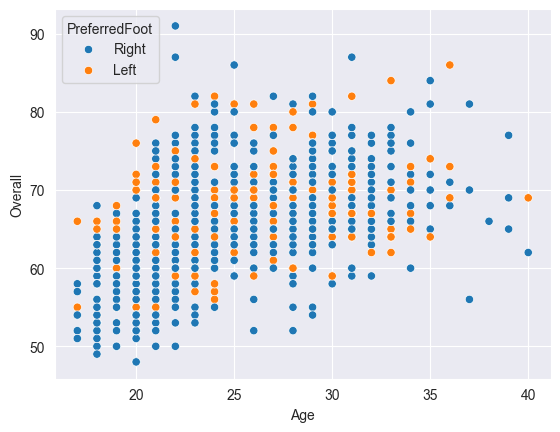

In [6]:
df_sample = df.sample(n=1000, random_state=42)
sns.scatterplot(data=df_sample, x='Age', y='Overall', hue='PreferredFoot')
plt.show

<Axes: xlabel='Age', ylabel='Overall'>

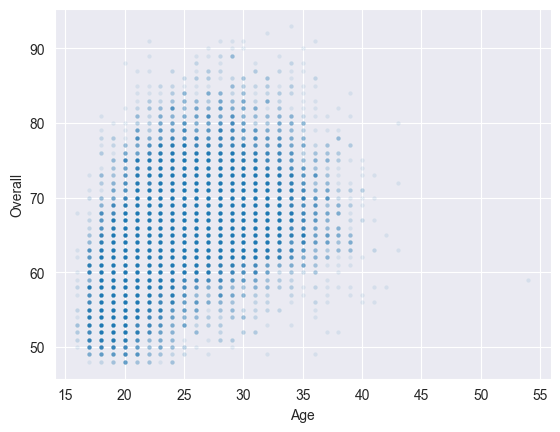

In [7]:
sns.scatterplot(data=df, x='Age', y='Overall', alpha=0.1, s=10)

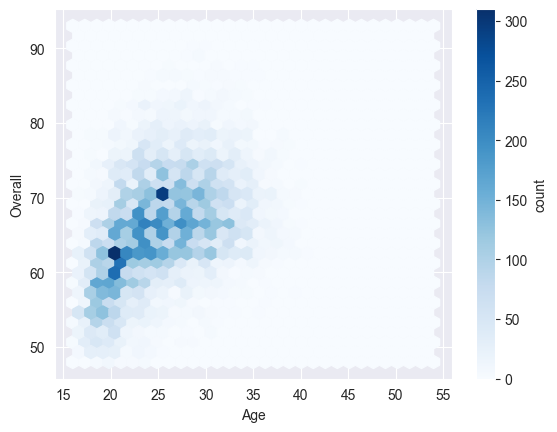

In [8]:
plt.hexbin(df['Age'], df['Overall'], gridsize=30, cmap='Blues')
plt.colorbar(label='count')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()

<Axes: xlabel='Age', ylabel='Overall'>

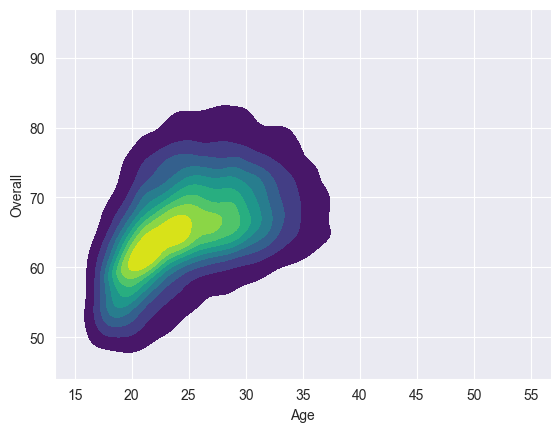

In [9]:
sns.kdeplot(data=df, x='Age', y='Overall', fill=True, cmap='viridis')

<Axes: xlabel='Age', ylabel='Overall'>

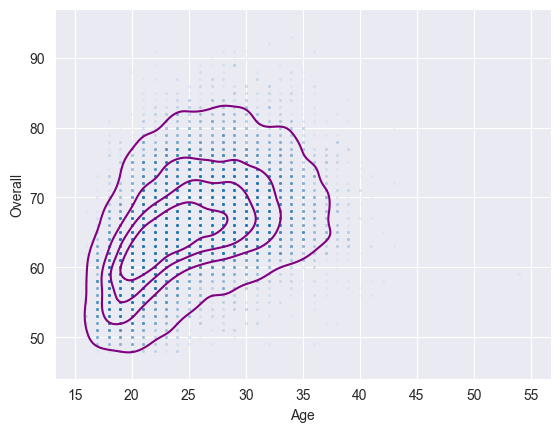

In [10]:
sns.scatterplot(data=df, x='Age', y='Overall', alpha=0.05, s=5)
sns.kdeplot(data=df, x='Age', y='Overall', color='purple', levels=5)

<Axes: xlabel='Age', ylabel='Overall'>

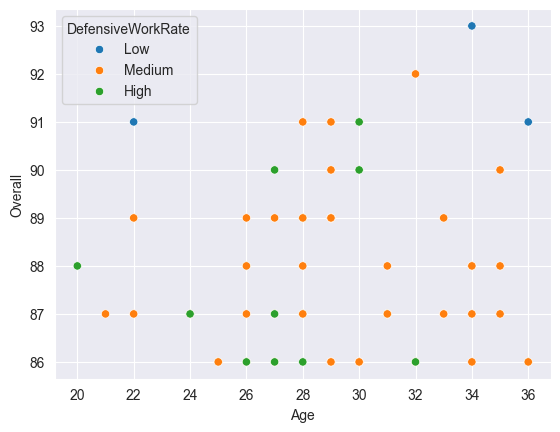

In [11]:
top_players = df[df['Overall'] > 85]
sns.scatterplot(data=top_players, x='Age', y='Overall', hue='DefensiveWorkRate')

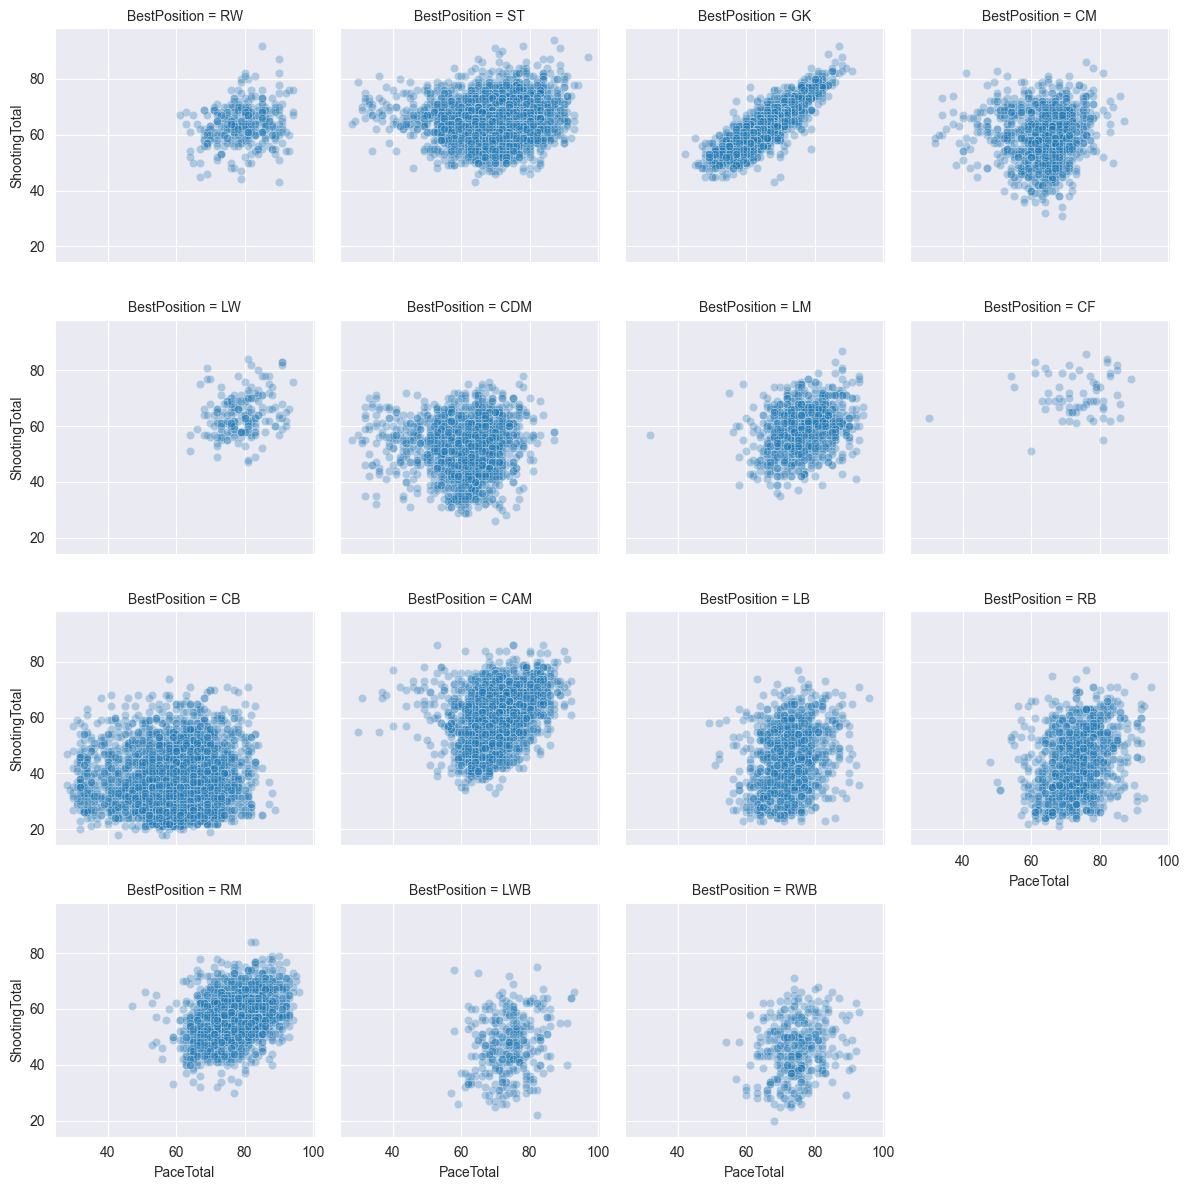

In [12]:
g = sns.FacetGrid(df, col='BestPosition', col_wrap=4, height=3)
g.map(sns.scatterplot, 'PaceTotal', 'ShootingTotal', alpha=0.3)

<Axes: xlabel='Age', ylabel='PaceTotal'>

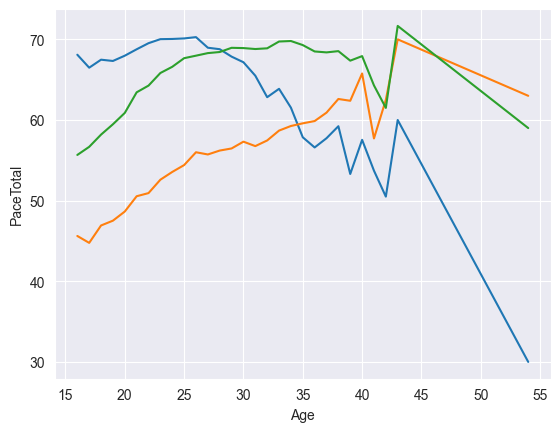

In [13]:
# Линий скилов резко взлетают в старом возрасте где-то между 40 и 45
# так как в таком возрасте дальше играют футболисты с хорошими навыками
df_grouped = df.groupby('Age').agg({
    'Overall': 'mean',
    'PaceTotal': 'mean',
    'ShootingTotal': 'mean'
}).reset_index()

sns.lineplot(data=df_grouped, x='Age', y='PaceTotal')
sns.lineplot(data=df_grouped, x='Age', y='ShootingTotal')
sns.lineplot(data=df_grouped, x='Age', y='Overall')

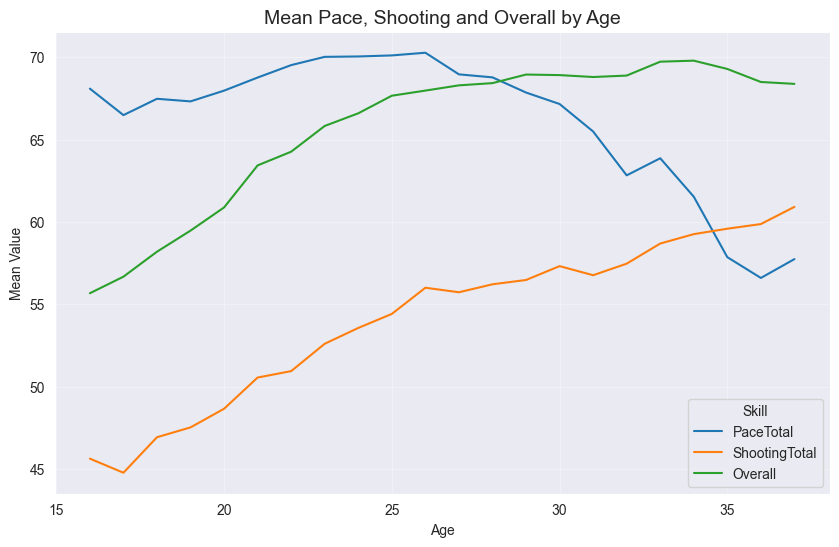

In [14]:
df_filtered = df_grouped[df_grouped['Age'] < 38]

df_melted = df_filtered.melt(id_vars='Age', value_vars=['PaceTotal', 'ShootingTotal', 'Overall'], var_name='Skill', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Age', y='Mean Value', hue='Skill')

plt.title('Mean Pace, Shooting and Overall by Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.legend(title='Skill')
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
df

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


<Axes: >

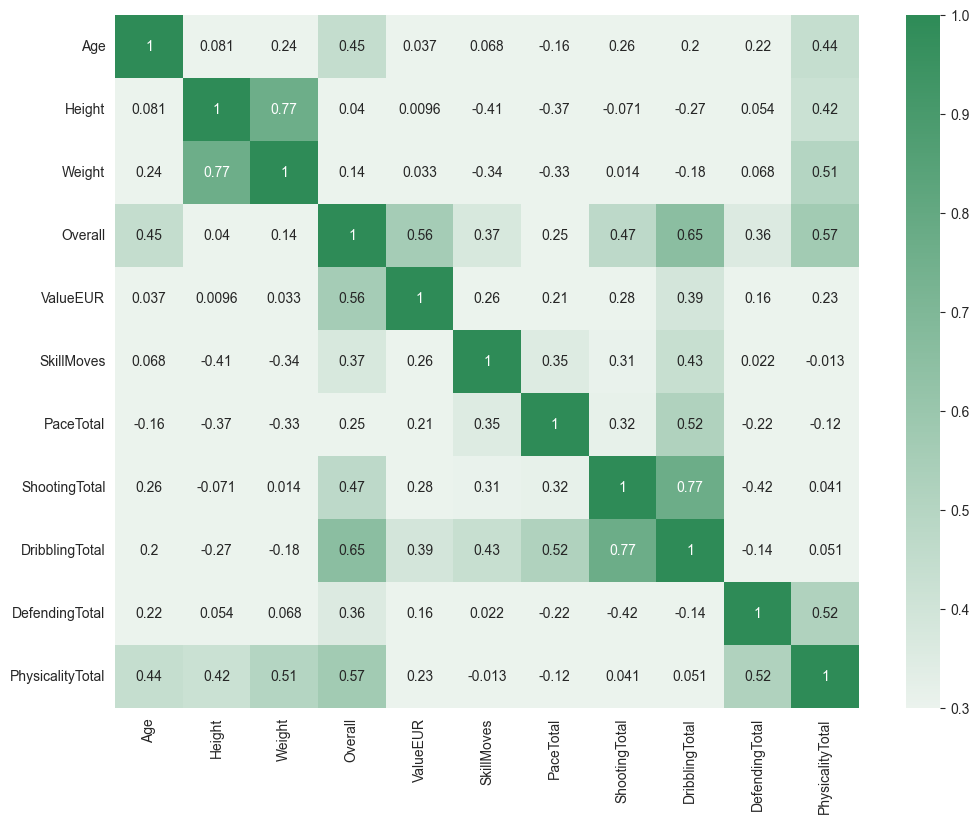

In [29]:
selected_features_corr = ['Age', 'Height', 'Weight', 'Overall', 'ValueEUR', 'SkillMoves', 'PaceTotal', 'ShootingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
corr_matrix = df[selected_features_corr].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix,
            annot=True,
            cmap=sns.light_palette("seagreen", as_cmap=True),
            vmin=0.3,
            vmax=1)